In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# generating training dataset


In [137]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving Train_Data.txt to Train_Data (1).txt


Saving Test_Data.txt to Test_Data (1).txt


In [138]:
# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_train)

df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_test)
#replace missing value ? with 0


          ID  x1  x2  x3  x4  x5  x6  x7  x8  x9  class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
594  1315506   4   8   6   3   4  10   7   1   1      4
595  1320141   5   1   1   1   2   1   2   1   1      2
596  1325309   4   1   2   1   2   1   2   1   1      2
597  1333063   5   1   3   1   2   1   3   1   1      2
598  1333495   3   1   1   1   2   1   2   1   1      2

[599 rows x 11 columns]
         ID  x1  x2  x3  x4  x5 x6  x7  x8  x9  class
0   1334659   5   2   4   1   1  1   1   1   1      2
1   1336798   3   1   1   1   2  1   2   1   1      2
2   1344449   1   1   1   1   1  1   2   1   1      2
3   1350568   4   1   1   1   2  1   2   1   1      2
4   1352663   5   4   6   8   4  

## Feature Selection or Manipulation


In [139]:
X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
# print(X['x6'][0:10])

y = df_train['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant

x_train = torch.Tensor(np.array([X['x1'], X['x7']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3]
print(x_train.shape)

# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(y).unsqueeze(1) # [500] -> [500, 1]
print(y_train.shape)

torch.Size([599, 2])
torch.Size([599, 1])


# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [140]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

print(x_train.shape)

# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 2]
print(list(model.parameters()))



torch.Size([599, 2])
[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


# function to get model parameters (w1, w2, b)

In [141]:
[w, b] = model.parameters() # Ws, bias
print(w) 
w1, w2= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(), b[0].item())

Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True)


# training the model 

In [142]:
# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9) #weight_decay=1e-5 -> L2 regularizer

# training the model 
epochs = 300
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculate loss 
  loss = criterion(y_pred, y_train)

  # L2 regularizer
  l_lambda = 0.01
  l_reg = torch.tensor(0.)
  for param in model.parameters():
      l_reg += torch.norm(param)  # for L1 regularizer : torch.norm(param, 1) 
      
  loss += l_lambda*l_reg

  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.7587953805923462
epoch:  1 loss:  0.7546693682670593
epoch:  2 loss:  0.7475148439407349
epoch:  3 loss:  0.7385463714599609
epoch:  4 loss:  0.728583037853241
epoch:  5 loss:  0.717842698097229
epoch:  6 loss:  0.7061562538146973
epoch:  7 loss:  0.6934270262718201
epoch:  8 loss:  0.6799812316894531
epoch:  9 loss:  0.6665436029434204
epoch:  10 loss:  0.6538819670677185
epoch:  11 loss:  0.6424261927604675
epoch:  12 loss:  0.6321634650230408
epoch:  13 loss:  0.6228452324867249
epoch:  14 loss:  0.614288330078125
epoch:  15 loss:  0.6065239906311035
epoch:  16 loss:  0.5997124314308167
epoch:  17 loss:  0.5939318537712097
epoch:  18 loss:  0.5890355110168457
epoch:  19 loss:  0.5846928954124451
epoch:  20 loss:  0.5805608630180359
epoch:  21 loss:  0.5764399766921997
epoch:  22 loss:  0.5723041892051697
epoch:  23 loss:  0.5682135820388794
epoch:  24 loss:  0.5642006397247314
epoch:  25 loss:  0.5602183938026428
epoch:  26 loss:  0.556167483329773
epoch:  27 loss

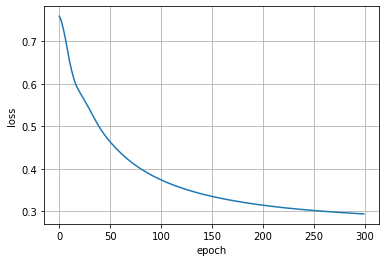

In [143]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# model evalation with new datasets the model has never seen before

In [144]:
X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
Y_test = df_test['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant

x_test = torch.Tensor(np.array([X_test['x1'], X_test['x2']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3]
print(x_test.shape)
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(Y_test).unsqueeze(1) # [500] -> [500, 1]
print(y_test.shape)

torch.Size([100, 2])
torch.Size([100, 1])


In [145]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 94.32387312186978%
Predcition accuracy_test= 98.0%
